In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

In [23]:
# Variable List
ticker_value = 'DIS'

In [24]:
def calculate_macd(data, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculate MACD, Signal Line, and generate buy/sell signals
    
    Parameters:
    data (pd.DataFrame): DataFrame with 'Close' price column
    fast_period (int): Fast EMA period (default: 12)
    slow_period (int): Slow EMA period (default: 26)
    signal_period (int): Signal line period (default: 9)
    
    Returns:
    pd.DataFrame: DataFrame with MACD indicators and signals
    """
    # Copy the dataframe to avoid modifying original data
    df = data.copy()
    
    # Calculate fast and slow EMAs
    df['EMA_fast'] = df['Close'].ewm(span=fast_period, adjust=False).mean()
    df['EMA_slow'] = df['Close'].ewm(span=slow_period, adjust=False).mean()
    
    # Calculate MACD line
    df['MACD'] = df['EMA_fast'] - df['EMA_slow']
    
    # Calculate Signal line
    df['Signal'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()
    
    # Calculate MACD histogram
    df['Histogram'] = df['MACD'] - df['Signal']
    
    # Generate buy/sell signals
    df['Signal_shift'] = df['Signal'].shift(1)
    df['MACD_shift'] = df['MACD'].shift(1)
    
    # Buy signal: MACD crosses above Signal line
    df['Buy_Signal'] = ((df['MACD'] > df['Signal']) & 
                       (df['MACD_shift'] <= df['Signal_shift']))
    
    # Sell signal: MACD crosses below Signal line
    df['Sell_Signal'] = ((df['MACD'] < df['Signal']) & 
                        (df['MACD_shift'] >= df['Signal_shift']))
    
    return df

In [25]:
def plot_macd_with_signals(df):
    """
    Plot price chart with MACD indicator and buy/sell signals
    
    Parameters:
    df (pd.DataFrame): DataFrame with MACD indicators and signals
    """
    # Create figure with secondary y-axis
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), height_ratios=[2, 1])
    plt.subplots_adjust(hspace=0.3)
    
    # Plot price
    ax1.plot(df.index, df['Close'], label='Price', color='black', alpha=0.7)
    ax1.set_title('Price Chart with Buy/Sell Signals')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    
    # Plot buy signals
    buy_signals = df[df['Buy_Signal']]
    ax1.scatter(buy_signals.index, buy_signals['Close'], 
               color='green', marker='^', s=100, label='Buy Signal')
    
    # Plot sell signals
    sell_signals = df[df['Sell_Signal']]
    ax1.scatter(sell_signals.index, sell_signals['Close'], 
               color='red', marker='v', s=100, label='Sell Signal')
    
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot MACD
    ax2.plot(df.index, df['MACD'], label='MACD', color='blue')
    ax2.plot(df.index, df['Signal'], label='Signal Line', color='orange')
    
    # Plot histogram
    ax2.bar(df.index, df['Histogram'], label='Histogram',
            color=df['Histogram'].apply(lambda x: 'green' if x > 0 else 'red'),
            alpha=0.3)
    
    ax2.set_title('MACD Indicator')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('MACD')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.show()

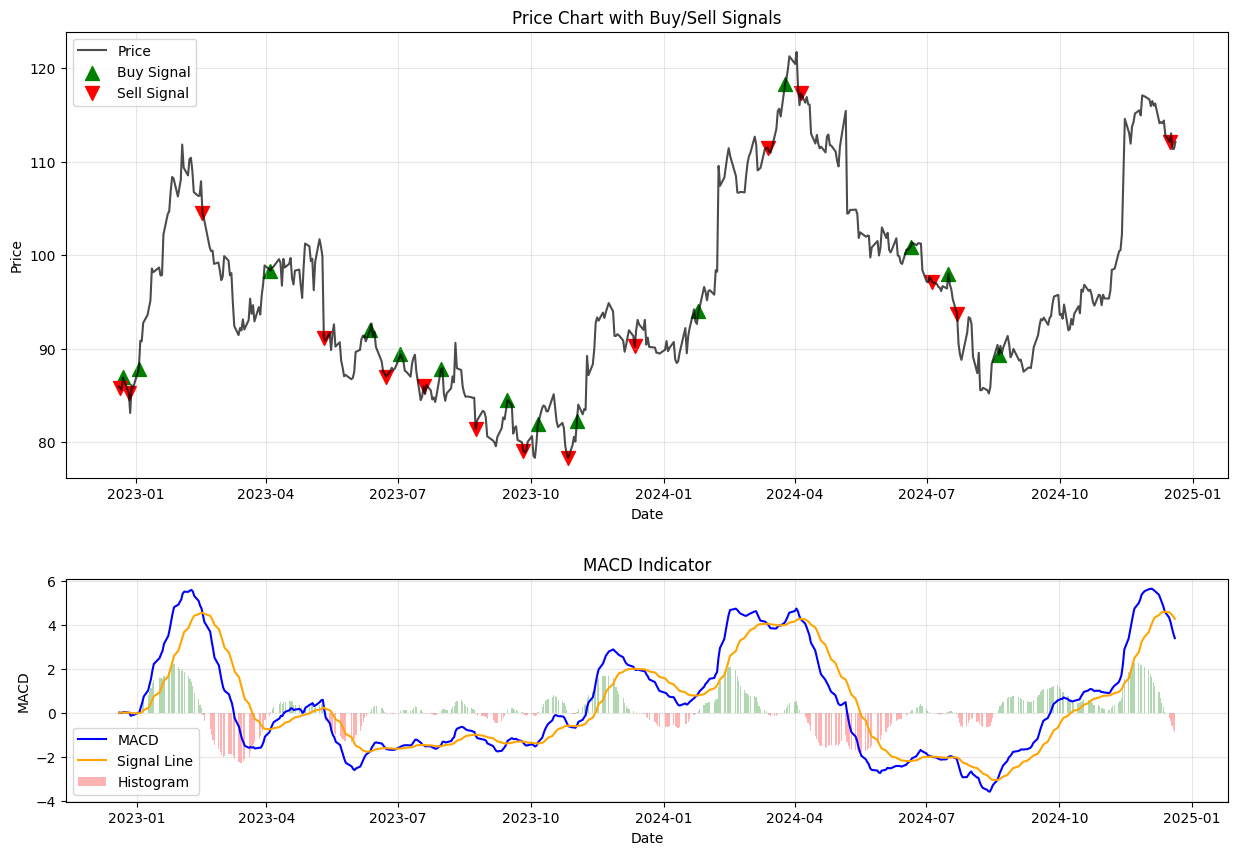

In [27]:
ticker = yf.Ticker(ticker_value)
df = ticker.history(period="2y")

# Calculate MACD and signals
df_macd = calculate_macd(df, 19, 39, 19)

# Plot results
plot_macd_with_signals(df_macd)

# Print buy/sell signals
# buy_signals = df_macd[df_macd['Buy_Signal']].index
# sell_signals = df_macd[df_macd['Sell_Signal']].index

# print("\nBuy Signals:")
# for date in buy_signals:
#     print(f"Buy at {date.strftime('%Y-%m-%d')}: Price = {df_macd.loc[date, 'Close']:.2f}")

# print("\nSell Signals:")
# for date in sell_signals:
#     print(f"Sell at {date.strftime('%Y-%m-%d')}: Price = {df_macd.loc[date, 'Close']:.2f}")